In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities_v3 import *
from shutil import copyfile

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
def repeat(arr, count):
    z_sig = []
    for i in range(count):
        z_sig.extend(arr)
    return z_sig

def mock_injection_signal_from_noise(alpha_scale,lambda_val,height_sep=-15.5,x_sep=13.9,offset_y=+4.9,phase_shift="TF"):
    stroke=-202
    frequency=3
    axis="z"
    yuk_or_grav="yuk"
    alpha=1
    bead_size=7.6
    signal_sim = force_vs_time(x_sep,height_sep,stroke,frequency,axis,lambda_val,offset_y,yuk_or_grav,alpha,bead_size)
    
    # shift phase of signal according to TF
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]

    # convert to bits, this works only for one second chunk!
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]

    TF_phases = [1.22,0.97,0.65,0.49,0.3,0.12,0.29,0.13,0.23,0.22,0.27,0.27,0.07]    
    if(phase_shift=="TF"):TF_phase_shift = TF_phases
    elif(phase_shift=="Flip"):TF_phase_shift = [-1*element for element in TF_phases] # this flips
    elif(phase_shift=="Random_TF"):TF_phase_shift = [1*np.random.normal(element,element/20) for element in TF_phases]
    elif(phase_shift=="Random"):TF_phase_shift =  np.random.uniform(-np.pi,np.pi,len(TF_phases))
    else:TF_phase_shift = len(TF_phases)*[0]
    print(TF_phase_shift)
    harmonics = np.arange(3,len(TF_phases)*3+3,3)

    #print(len(TF_phase_shift))
    # 6 charges new
    amplitude_scale = [2.40E-17,1.35E-17,1.05E-17,9.78E-18,9.45E-18,9.81E-18,9.82E-18,1.04E-17,9.92E-18,7.50E-18,8.37E-18,7.10E-18,7.84E-18]

    fft_sim = np.fft.rfft(signal_sim[1]) 
    new_fft_sim = fft_sim.copy()
    new_fft_shift_only = fft_sim.copy()
   # new_fft_sim[0]=1/np.mean(amplitude_scale) * np.abs(fft_sim[0]) # not necessary?
    for harmonic in harmonics:
        new_fft_shift_only[harmonic] = np.abs(fft_sim[harmonic])*np.exp(1j*(np.angle(fft_sim[harmonic])+TF_phase_shift[harmonic//3-1]))
        new_fft_sim[harmonic] = 1/amplitude_scale[harmonic//3-1] * np.abs(fft_sim[harmonic])*np.exp(1j*(np.angle(fft_sim[harmonic])+TF_phase_shift[harmonic//3-1]))

    signal_sim_shift=np.fft.irfft(new_fft_shift_only) 
    signal_sim_shift_scale =np.fft.irfft(new_fft_sim) 
    
    
    # extend to 10s
    z_sig = repeat(signal_sim_shift_scale,10)
    # scale to desired alpha
    z_trans_amp = np.multiply(z_sig,alpha_scale)
    
    return z_trans_amp,TF_phase_shift,amplitude_scale


def mock_injection_signal_from_bkg(alpha_scale,lambda_val,height_sep=-15.5,x_sep=13.9,offset_y=+4.9,phase_shift="TF"):
    stroke=-202
    frequency=3
    axis="z"
    yuk_or_grav="yuk"
    alpha=1
    bead_size=7.6
    signal_sim = force_vs_time(x_sep,height_sep,stroke,frequency,axis,lambda_val,offset_y,yuk_or_grav,alpha,bead_size)
    
    # shift phase of signal according to TF
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]

    # convert to bits, this works only for one second chunk!
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]

    TF_phases = [1.22,0.97,0.65,0.49,0.3,0.12,0.29,0.13,0.23,0.22,0.27,0.27,0.07]    
    if(phase_shift=="TF"):TF_phase_shift = TF_phases
    elif(phase_shift=="Flip"):TF_phase_shift = [-1*element for element in TF_phases] # this flips
    elif(phase_shift=="Random_TF"):TF_phase_shift = [1*np.random.normal(element,element/20) for element in TF_phases]
    elif(phase_shift=="Random"):TF_phase_shift =  np.random.uniform(-np.pi,np.pi,len(TF_phases))
    else:TF_phase_shift = len(TF_phases)*[0]
    print(TF_phase_shift)
    harmonics = np.arange(3,len(TF_phases)*3+3,3)

    #print(len(TF_phase_shift))
    # 6 charges new
    amplitude_scale = [2.40E-17,1.35E-17,1.05E-17,9.78E-18,9.45E-18,9.81E-18,9.82E-18,1.04E-17,9.92E-18,7.50E-18,8.37E-18,7.10E-18,7.84E-18]

    fft_sim = np.fft.rfft(signal_sim[1]) 
    new_fft_sim = fft_sim.copy()
    new_fft_shift_only = fft_sim.copy()
    #new_fft_sim[0]=1/np.mean(amplitude_scale) * np.abs(fft_sim[0]) # not necessary?
    for harmonic in harmonics:
        new_fft_shift_only[harmonic] = np.abs(fft_sim[harmonic])*np.exp(1j*(np.angle(fft_sim[harmonic])+TF_phase_shift[harmonic//3-1]))
        new_fft_sim[harmonic] = 1/amplitude_scale[harmonic//3-1] * np.abs(fft_sim[harmonic])*np.exp(1j*(np.angle(fft_sim[harmonic])+TF_phase_shift[harmonic//3-1]))

    signal_sim_shift=np.fft.irfft(new_fft_shift_only) 
    signal_sim_shift_scale =np.fft.irfft(new_fft_sim) 
    
    
    # extend to 10s
    z_sig = repeat(signal_sim_shift_scale,10)
    # scale to desired alpha
    z_sig_10 = np.multiply(z_sig,alpha_scale)
    
    return z_sig_10,TF_phase_shift,amplitude_scale


def mock_injection_bkg(alpha_scale_bkg,lambda_val,height_sep=-15.5,x_sep=13.9,offset_y=+4.9,TF_phases_bkg = [1.22,0.97,0.65,0.49,0.3,0.12,0.29,0.13,0.23,0.22,0.27,0.27,0.07]):
    stroke=-202
    frequency=3
    axis="z"
    yuk_or_grav="yuk"
    alpha=1
    bead_size=7.6
    background_sim = force_vs_time(x_sep,height_sep,stroke,frequency,axis,lambda_val,offset_y,yuk_or_grav,alpha,bead_size)
    
    # shift phase of signal according to TF
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]

    # convert to bits, this works only for one second chunk!
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]
    harmonics = np.arange(3,len(TF_phases_bkg)*3+3,3)

    #print(len(TF_phase_shift))
    # 6 charges new
    
    #alpha_scale_bkg = [1/1]*len(TF_phases)#/1e10
    TF_amp_scale = [2.40E-17,1.35E-17,1.05E-17,9.78E-18,9.45E-18,9.81E-18,9.82E-18,1.04E-17,9.92E-18,7.50E-18,8.37E-18,7.10E-18,7.84E-18]
    amplitude_scale = np.multiply(TF_amp_scale,alpha_scale_bkg)
    fft_sim_bkg = np.fft.rfft(background_sim[1]) 
        
    new_fft_sim_bkg = fft_sim_bkg.copy()
    #new_fft_sim_bkg[0]=1/np.mean(amplitude_scale) * np.abs(fft_sim_bkg[0]) # not necessary?
    #print(np.abs(fft_sim_bkg[0]),1/np.mean(amplitude_scale),np.abs(new_fft_sim_bkg[0]))

    for harmonic in harmonics:
        new_fft_sim_bkg[harmonic] = 1/amplitude_scale[harmonic//3-1]*(np.abs(fft_sim_bkg[harmonic])) *np.exp(1j*(np.angle(fft_sim_bkg[harmonic])+TF_phases_bkg[harmonic//3-1]))

    signal_sim_bkg =np.fft.irfft(new_fft_sim_bkg) 
    
    
    # extend to 10s
    z_bkg = repeat(signal_sim_bkg,10)
    # scale to desired alpha - not used anymore
    z_bkg_10 = np.multiply(z_bkg,1)
    
    return z_bkg_10,TF_phases_bkg,amplitude_scale,alpha_scale_bkg

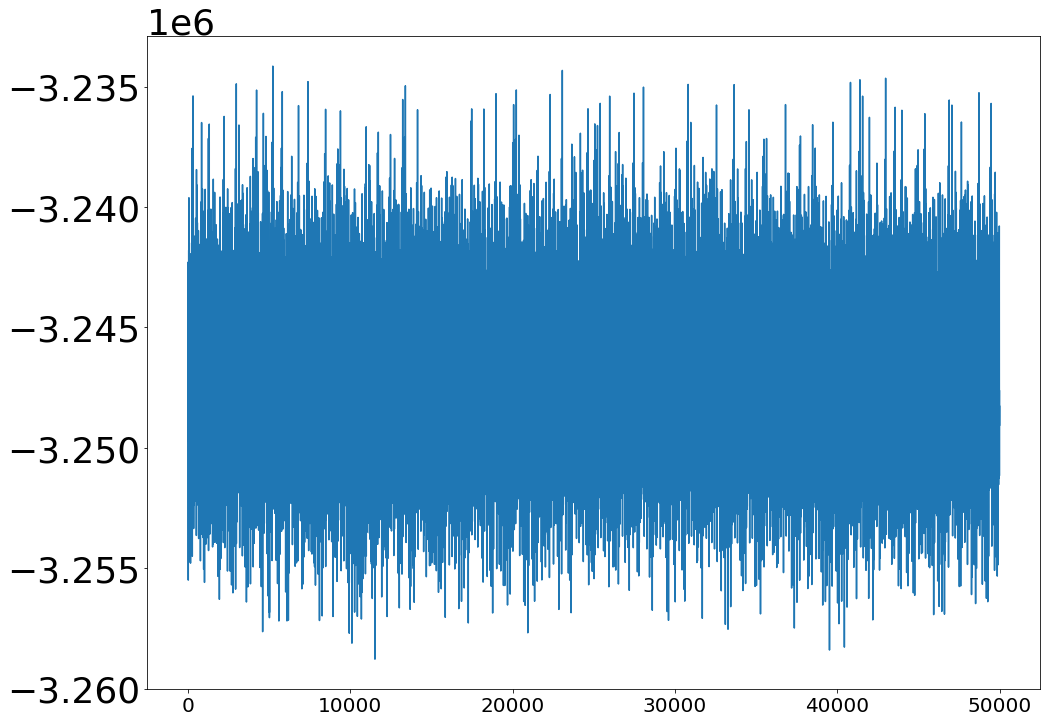

In [67]:
# step 1: load a raw file

raw_file="/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_200.h5"

with h5py.File(raw_file, 'r') as f_raw:
    quad_data_raw = np.array(f_raw['quad_data'])
    data_raw = quad_data_raw.reshape(-1,12).T[9]
    f_raw.close()
    
plt.plot(data_raw)

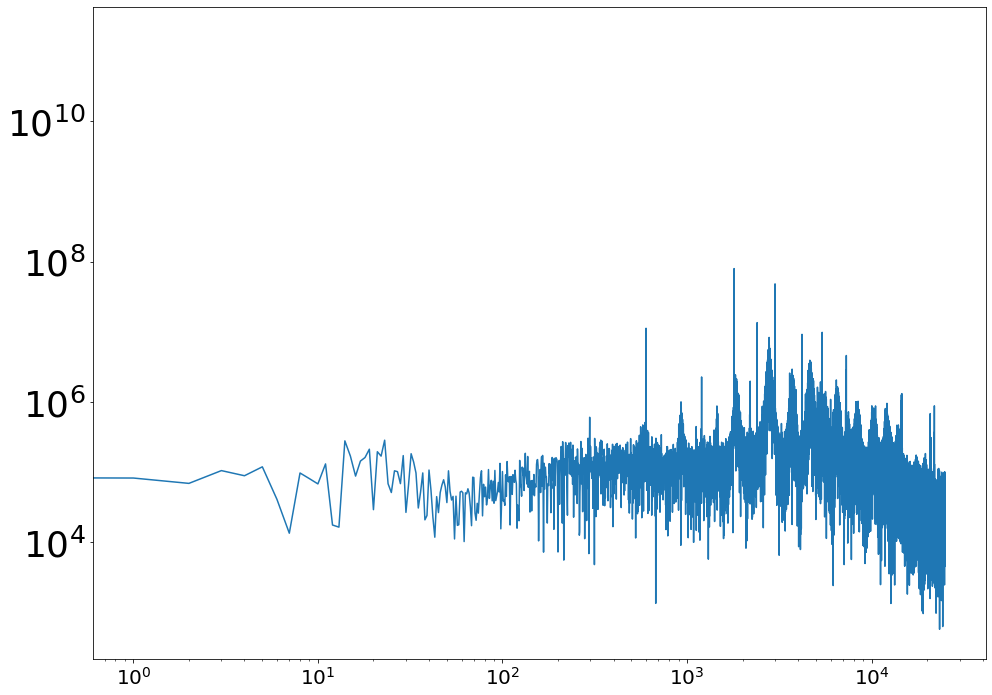

In [68]:
fft_raw= np.abs(np.fft.rfft(data_raw))
plt.loglog(fft_raw)

In [69]:
# step2 produce a noise + signal
alpha_scale=2e8
lambda_val=10

noise_sig,_,_= mock_injection_signal_from_noise(alpha_scale,lambda_val,height_sep=-15.5,x_sep=13.9,offset_y=+4.9,phase_shift="TF")

Loading Gravity Data... Done!
81 9.74070978211e-06
Loaded Yukawa Force
[1.22, 0.97, 0.65, 0.49, 0.3, 0.12, 0.29, 0.13, 0.23, 0.22, 0.27, 0.27, 0.07]


In [70]:
#if (i % 10==0):print("%f percent" %(i/max_file*100))
with h5py.File(raw_file, 'r') as f_n:
    quad_data_in = np.array(f_n['quad_data'])
    data_in = quad_data_in.reshape(-1,12).T[9]
    #plt.plot(np.array(data_in))
    random_uni =np.random.uniform(-0.5,0.5,len(data_in)) # make a list of random numbers between -0.5 and 0.5
    new_data_uni = data_in + random_uni# add them                 
    z_sn = np.add(np.array(new_data_uni),np.array(noise_sig))
    z_sn_round = [round(element) for element in z_sn] # round to half even
    f_n.close()

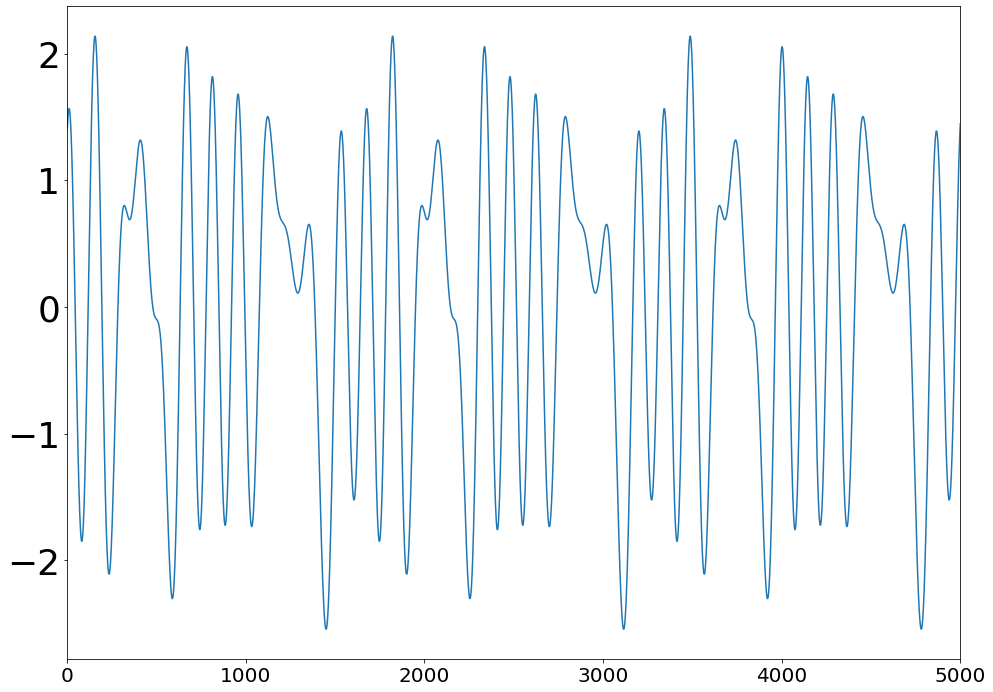

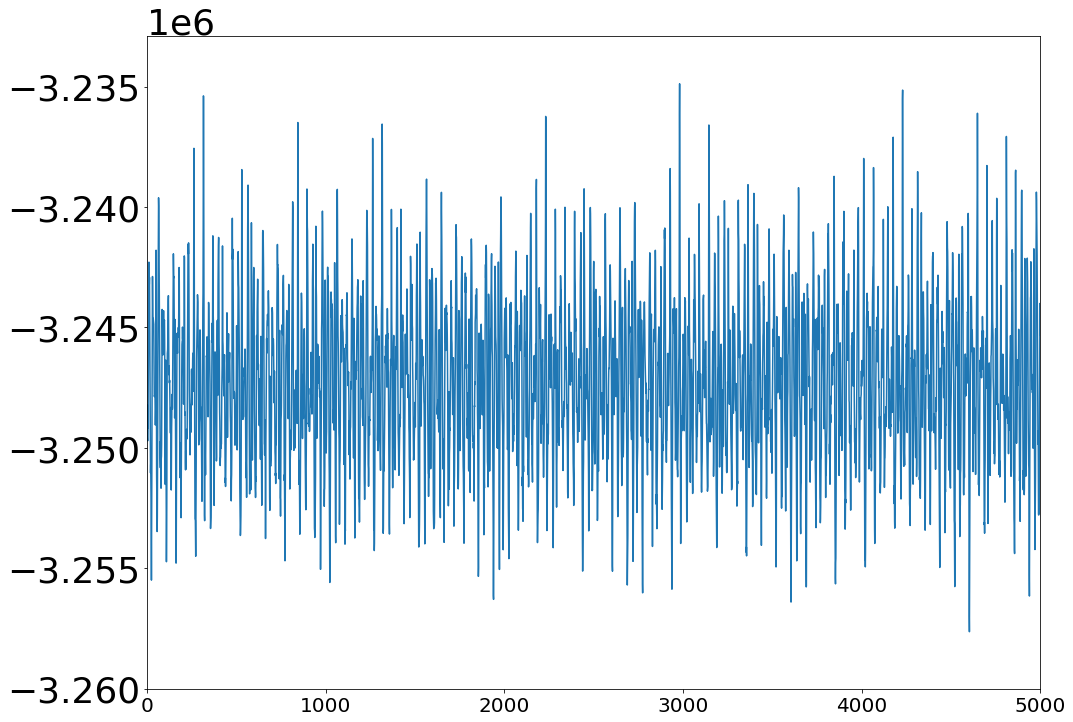

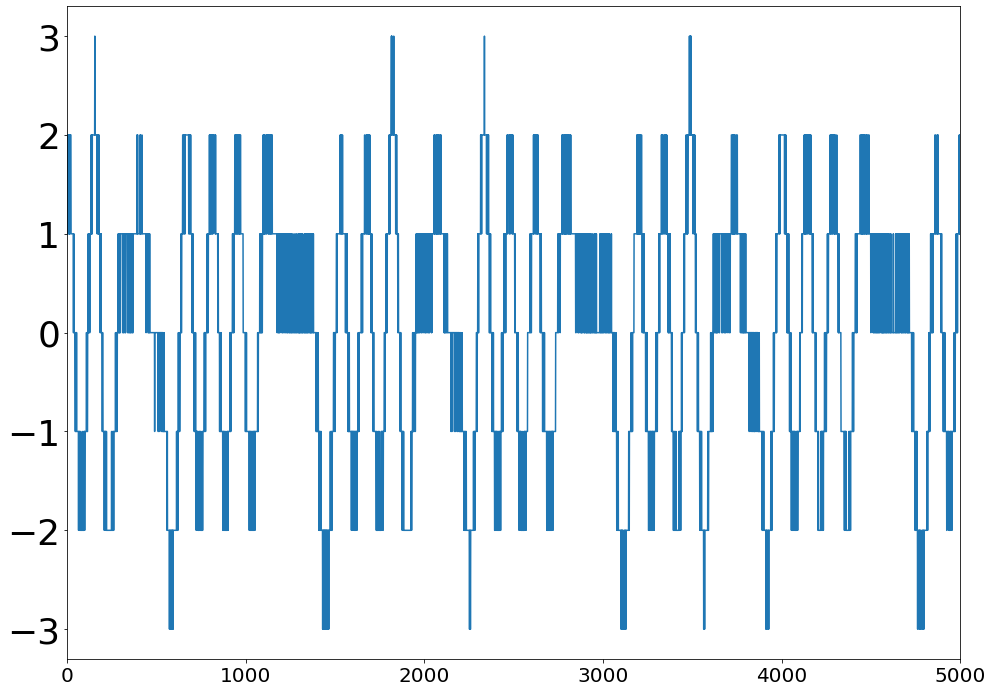

In [71]:
plt.plot(noise_sig)
plt.xlim(0,5000)
plt.show()
plt.plot(z_sn_round)
plt.xlim(0,5000)
plt.show()
plt.plot(z_sn_round-data_raw)
plt.xlim(0,5000)
plt.show()

In [113]:
# step3 now do it with the background

alpha_scale_bkg = [1/2e8]*13
TF_phases_bkg =  [1.22,0.97,0.65,0.49,0.3,0.12,0.29,0.13,0.23,0.22,0.27,0.27,0.07]    

bkg_sig,_,_= mock_injection_signal_from_bkg(alpha_scale,lambda_val,height_sep=-15.5,x_sep=13.9,offset_y=+4.9,phase_shift="TF")
bkg_bkg,_,_,_ =mock_injection_bkg(alpha_scale_bkg=alpha_scale_bkg,lambda_val=10,height_sep=-15.5,x_sep=13.9,offset_y=+4.9,TF_phases_bkg = TF_phases_bkg)

Loading Gravity Data... Done!
81 9.74070978211e-06
Loaded Yukawa Force
[1.22, 0.97, 0.65, 0.49, 0.3, 0.12, 0.29, 0.13, 0.23, 0.22, 0.27, 0.27, 0.07]
Loading Gravity Data... Done!
81 9.74070978211e-06
Loaded Yukawa Force


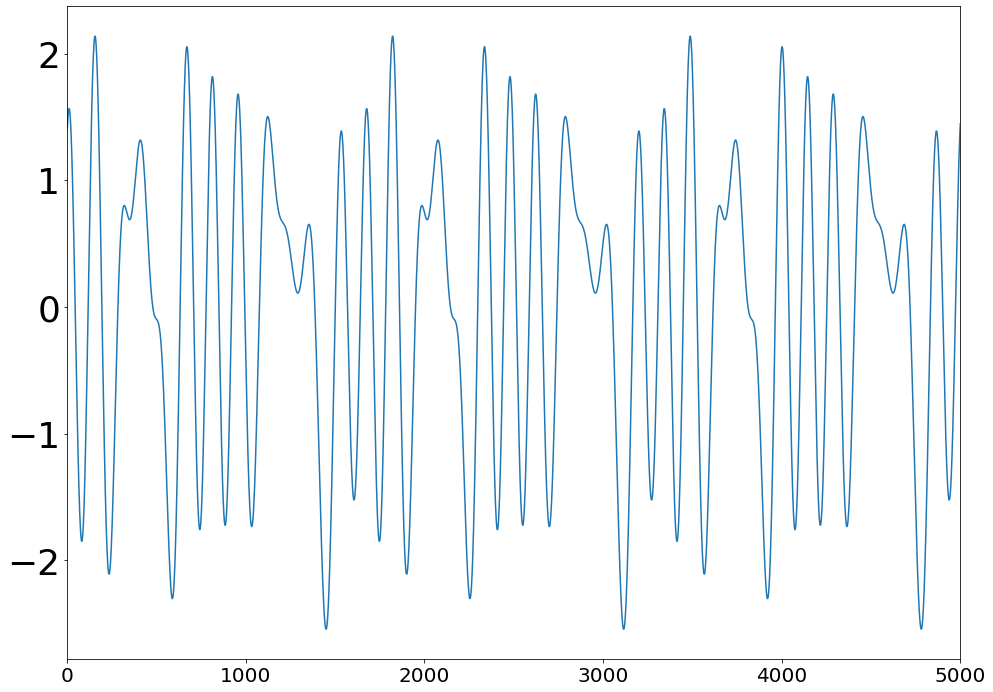

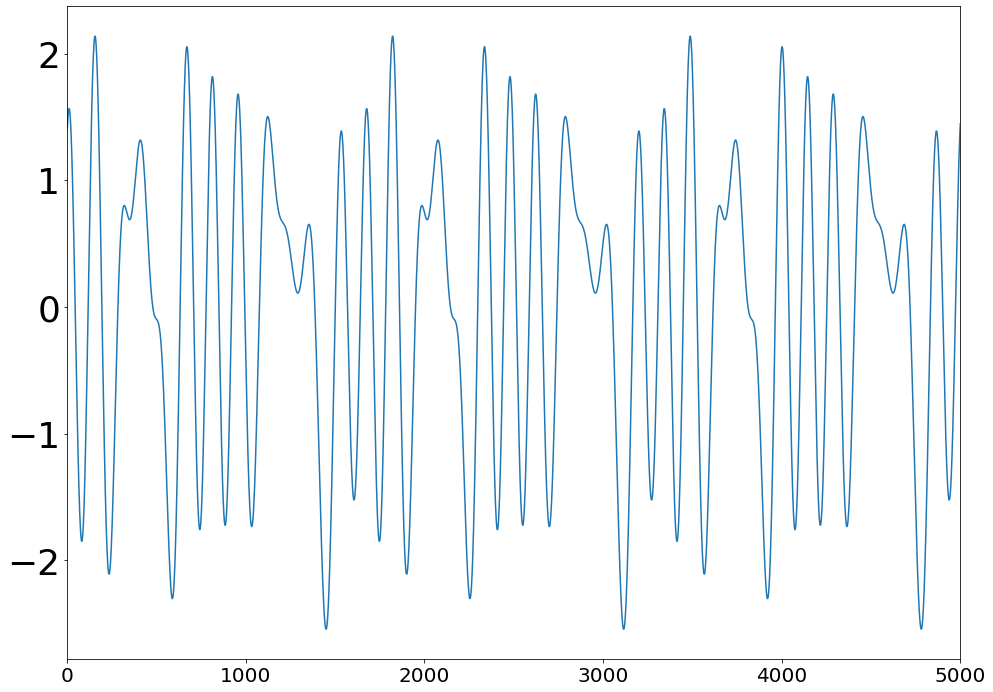

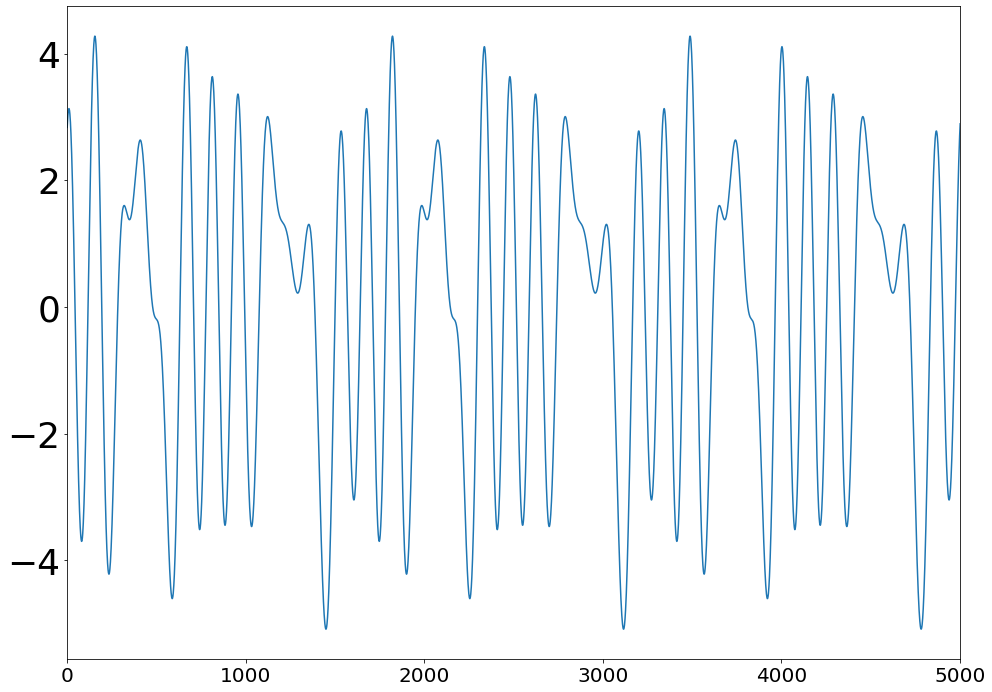

In [114]:
plt.plot(bkg_sig)
plt.xlim(0,5000)
plt.show()
plt.plot(bkg_bkg)
plt.xlim(0,5000)
plt.show()
final_signal = bkg_sig+bkg_bkg
plt.plot(final_signal)
plt.xlim(0,5000)
plt.show()

In [115]:
with h5py.File(raw_file, 'r') as f_b:
    quad_data_b = np.array(f_b['quad_data'])
    data_b = quad_data_in.reshape(-1,12).T[9]
    #plt.plot(np.array(data_in))
    random_uni =np.random.uniform(-0.5,0.5,len(data_in)) # make a list of random numbers between -0.5 and 0.5
    new_data_uni = data_in + random_uni# add them                 
    z_snb = np.add(np.array(new_data_uni),np.array(final_signal))
    z_snb_round = [round(element) for element in z_snb] # round to half even
    f_b.close()

(0.0, 5000.0)

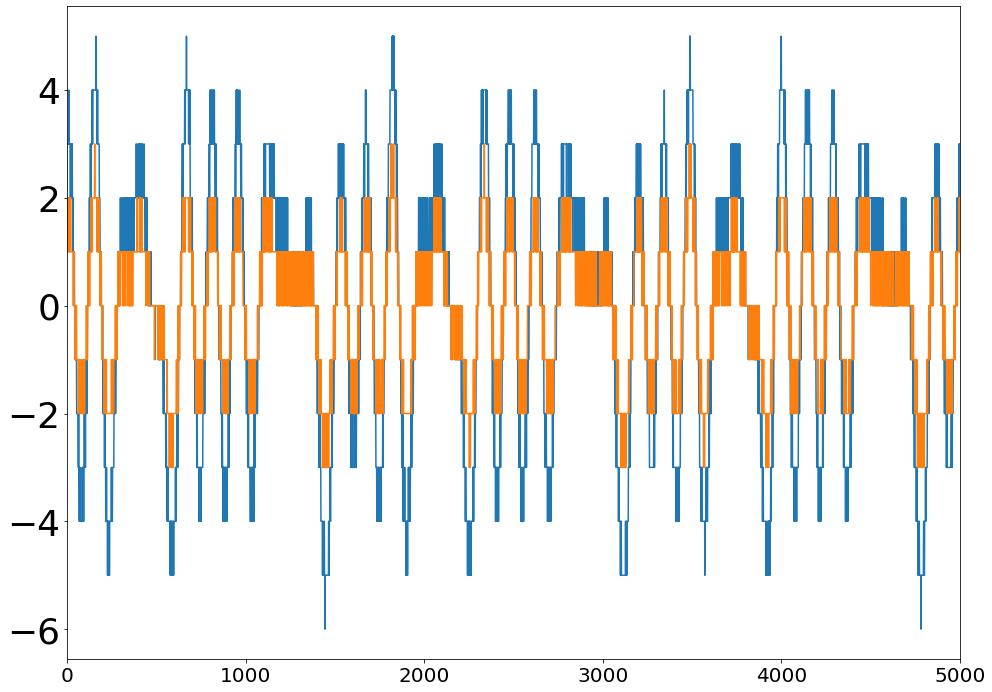

In [116]:
plt.plot(z_snb_round-data_raw)
plt.plot(z_sn_round-data_raw)
plt.xlim(0,5000)

(0.0, 500.0)

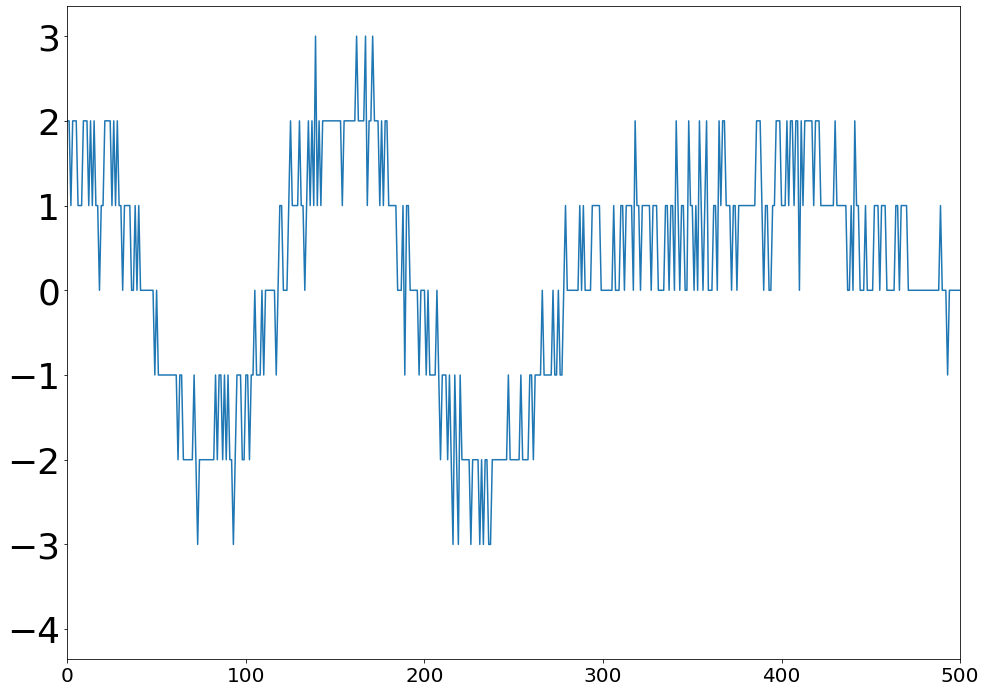

In [117]:
plt.plot(np.subtract(z_snb_round,z_sn_round))
plt.xlim(0,500)

In [118]:
fft1= np.abs(np.fft.rfft(z_sn_round))
fft2= np.abs(np.fft.rfft(z_snb_round))

(0.95, 1.05)

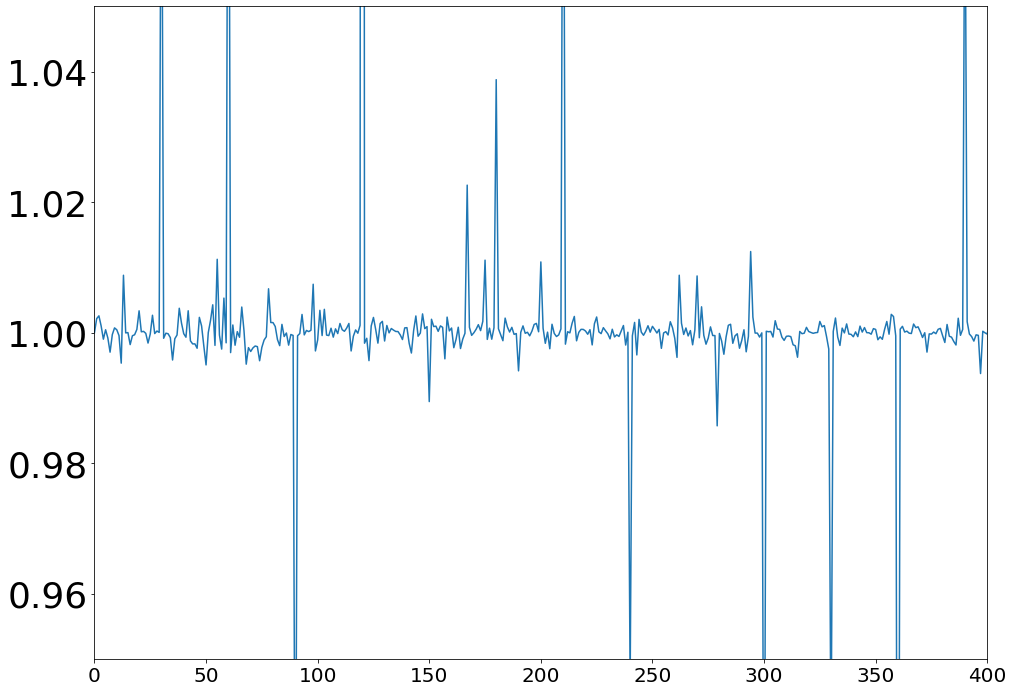

In [119]:
plt.plot(fft2/fft1)
plt.xlim(0,400)
plt.ylim(0.95,1.05)

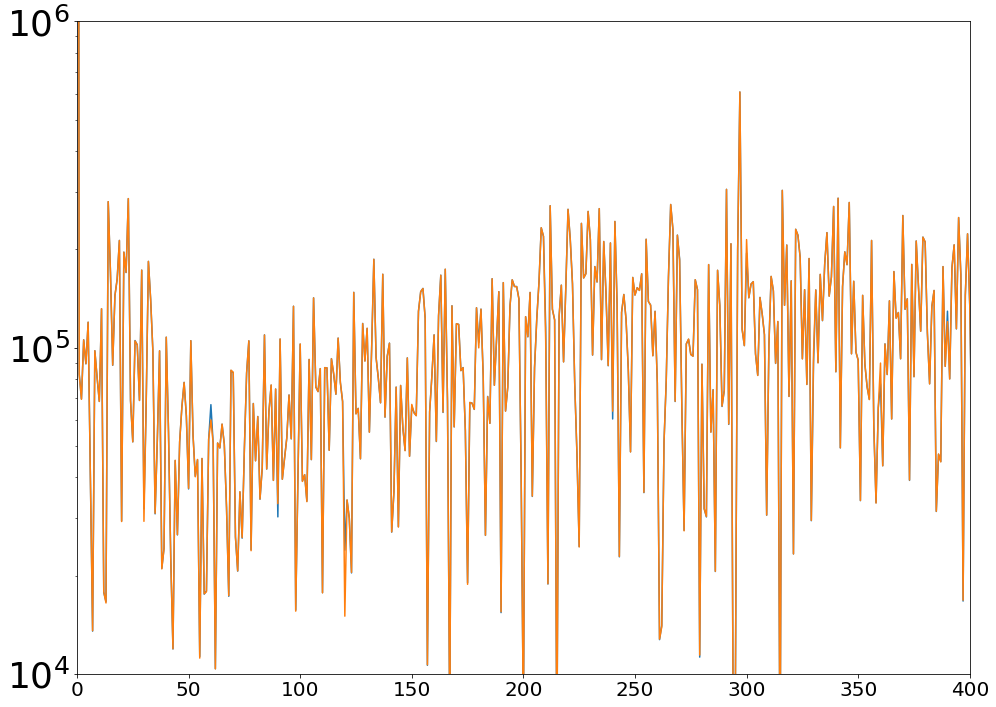

In [120]:
plt.plot(fft2)
plt.plot(fft1)
plt.yscale("log")
plt.xlim(0,400)
plt.ylim(1e4,1e6)
plt.show()

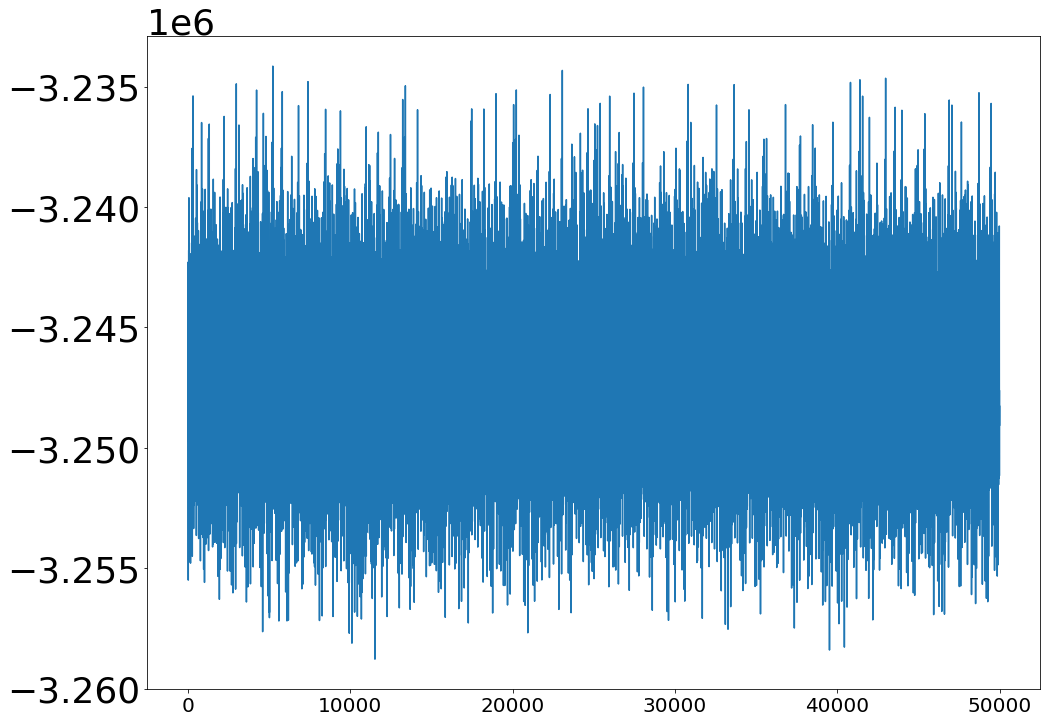

In [57]:
# step 1: load a file

raw_file="/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_200.h5"


with h5py.File(raw_file, 'r') as f_raw:
    quad_data_raw = np.array(f_raw['quad_data'])
    data_raw = quad_data_raw.reshape(-1,12).T[9]
    f_raw.close()
    
plt.plot(data_raw)

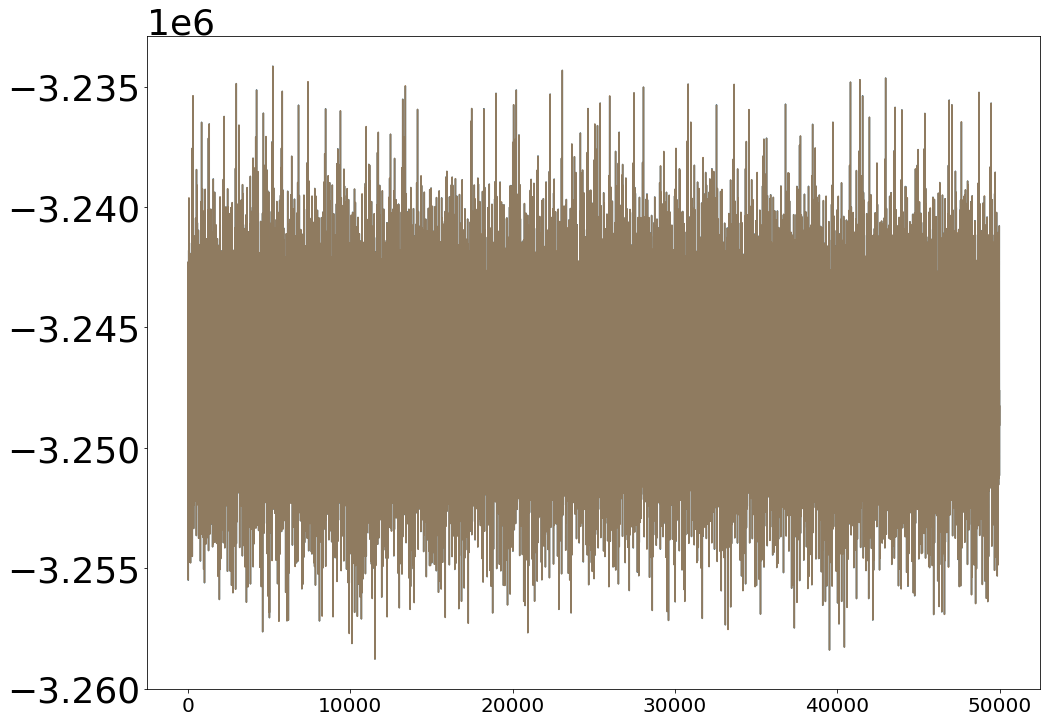

In [68]:
# step 1: load a file

#raw_file="/data/new_trap_processed/mockfiles/20200320/output/noise/SBiN_2a/1/Noise_batch_0.h5"#NoShaking_1_200.h5"
test_file="/data/new_trap_processed/mockfiles/20200320/output/noise/testforalex/1/Noise_batch_0.h5"#NoShaking_1_200.h5"
test_file2="/data/new_trap_processed/mockfiles/20200320/output/noise/testforalex2/1/Noise_batch_0.h5"#NoShaking_1_200.h5"

fdir="/data/new_trap_processed/mockfiles/20200320/output/noise/testforalex/"
alpha_scale_bkg_pull = np.load(fdir+"alpha_scale_bkg_pull.npy")
alpha_scale_bkg_push = np.load(fdir+"alpha_scale_bkg_push.npy")
fdir2="/data/new_trap_processed/mockfiles/20200320/output/noise/testforalex2/"
alpha_scale_bkg_pull2 = np.load(fdir2+"alpha_scale_bkg_pull.npy")
alpha_scale_bkg_push2 = np.load(fdir2+"alpha_scale_bkg_push.npy")



with h5py.File(test_file, 'r') as f_in:
    quad_data_in = np.array(f_in['quad_data'])
    data_in = quad_data_in.reshape(-1,12).T[9]
    f_in.close()
    
plt.plot(data_in)

with h5py.File(test_file2, 'r') as f_in2:
    quad_data_in2 = np.array(f_in2['quad_data'])
    data_in2 = quad_data_in2.reshape(-1,12).T[9]
    f_in2.close()
    
plt.plot(data_in2,alpha=0.5)

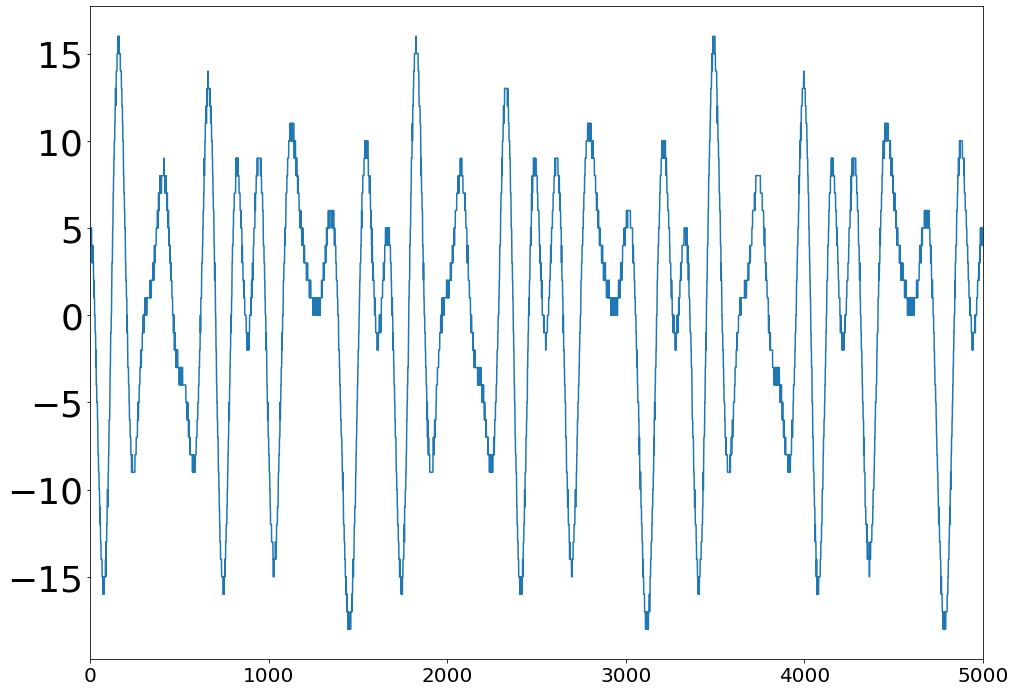

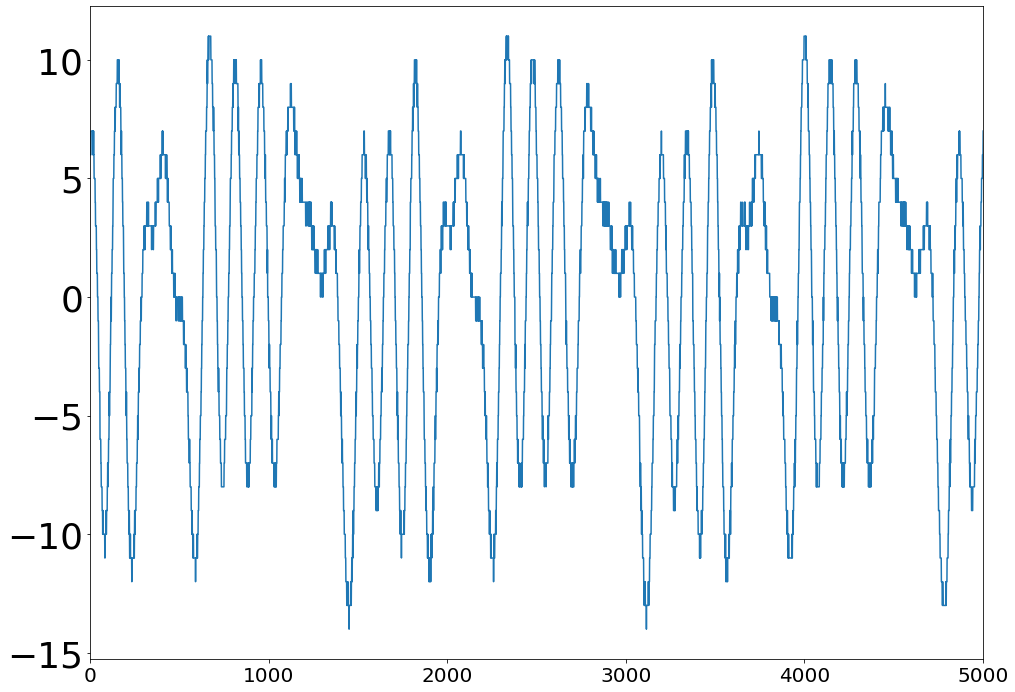

In [98]:
plt.plot(data_in-data_raw)
plt.xlim(0,5000)
plt.show()
plt.plot(data_in2-data_raw)
plt.xlim(0,5000)

plt.show()

In [77]:
signal_and_background1 = data_in-data_raw
signal_and_background2 = data_in2-data_raw


In [78]:
fft_sb = np.abs(np.fft.rfft(signal_and_background))
fft_angle = np.angle(np.fft.rfft(signal_and_background))

In [79]:
fft_sb2 = np.abs(np.fft.rfft(signal_and_background2))
fft_angle2 = np.angle(np.fft.rfft(signal_and_background2))

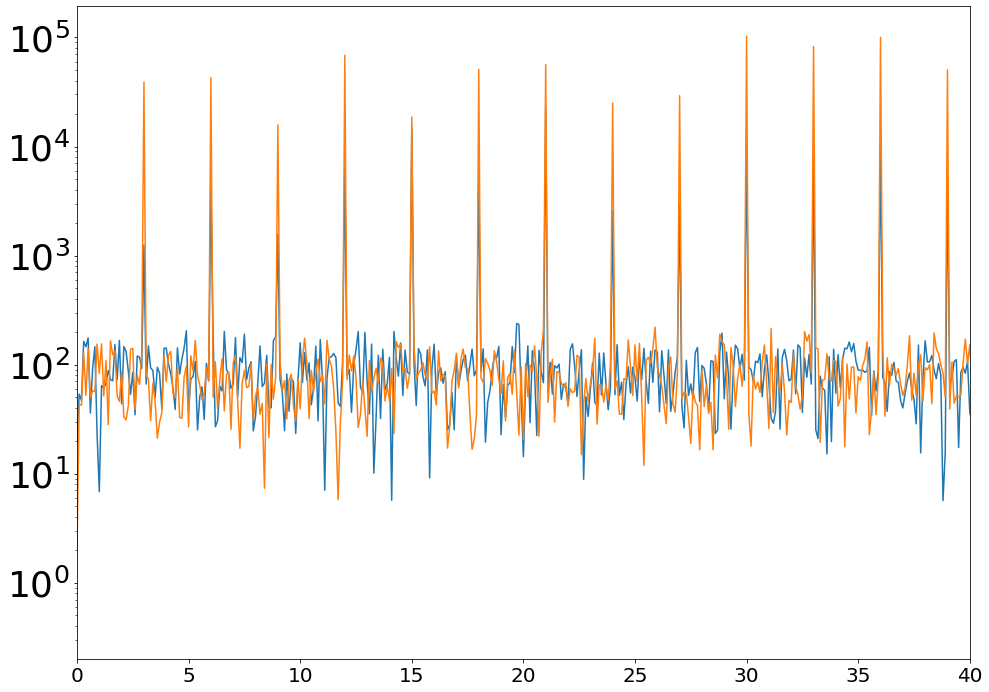

(0.0, 35.0)

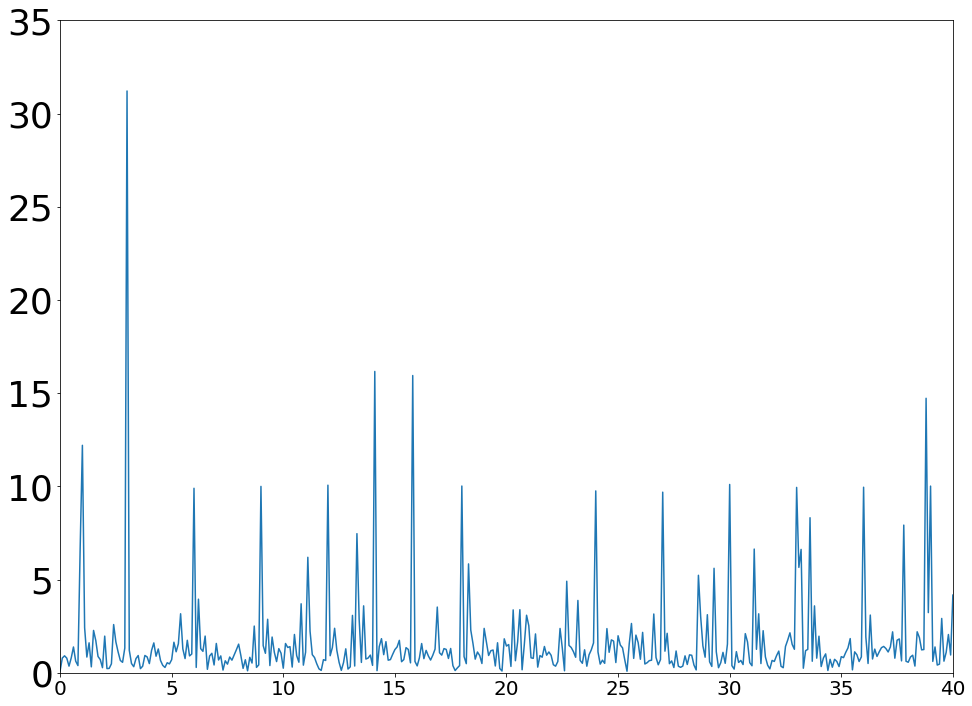

In [89]:
x=np.arange(0,2500.1,0.1)
plt.plot(x,fft_sb)
plt.plot(x,fft_sb2)

plt.yscale("log")
plt.xlim(0,40)
plt.show()
plt.plot(x,fft_sb2/fft_sb)
#plt.yscale("log")
plt.xlim(0,40)
plt.ylim(0,35)

In [93]:
for y in np.arange(3,42,3):
    print(fft_angle[y])

-0.663501678484
1.4855967099
1.38760377211
-0.563275248576
0.406280799604
1.31524176528
1.79082042954
1.33971630444
-0.274004761976
2.81964209465
2.24820391124
-2.095672902
-1.51191306489


In [96]:
for y in np.arange(3,42,3):
    print(fft_angle2[y]-fft_angle[y])

-1.90975279558
-4.13434309314
-2.9388950809
3.53871183267
-3.08047219815
-4.44754398592
-0.799469975299
-2.73239908665
0.92314985681
-0.0307601404784
-3.99627101286
0.332860500803
0.984823042577
